Step 1 : Importing necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler

Step 2: Loading Dataset

In [3]:
data =pd.read_excel('ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


Step 3: Data Preprocessing

3a: Cleaning- Renaming columns to make it readable

In [4]:
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height',
                'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating_Load', 'Cooling_Load']


3b: Selecting Dependent variable(Target) and Independent variable (features)

In [5]:
X = data[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
          'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution']]
y = data['Heating_Load']

3c. Splitting the data

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

3d.Scaling the data

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 4 : Train the Model

In [9]:
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

print("Model coefficient:" , lr.coef_)
print("Model Intercept:" , lr.intercept_)

Model coefficient: [-6.51760118e+00  2.62251733e+14 -1.28910762e+14 -2.67484996e+14
  7.20312500e+00 -3.77258301e-01  2.32348633e+00  6.12686157e-01]
Model Intercept: 22.31475778505554


Step 5 : Model Prediction

In [10]:
y_Pred = lr.predict(X_test_scaled)

Displaying few predictions with actual values

In [14]:
comp = pd.DataFrame({'Actual': y_test[:10] , 'Predicted': y_Pred[:10]})
print(comp)

     Actual  Predicted
668   16.47  18.830899
324   13.17  14.060086
624   32.82  31.473435
690   41.32  35.515541
473   16.69  15.613487
204   23.80  29.734055
97    24.31  25.537578
336   28.67  28.478232
568   19.52  17.368789
148   28.07  28.602365


Step 6 : performance Metrics

In [15]:
print("Mean squared Error : " ,mean_squared_error(y_test,y_Pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_Pred))
print("r2_score:",r2_score(y_test,y_Pred))

Mean squared Error :  9.390934754715563
Mean Absolute Error:  2.1952769817044526
r2_score: 0.9099038886329173


Step 7: Visualization

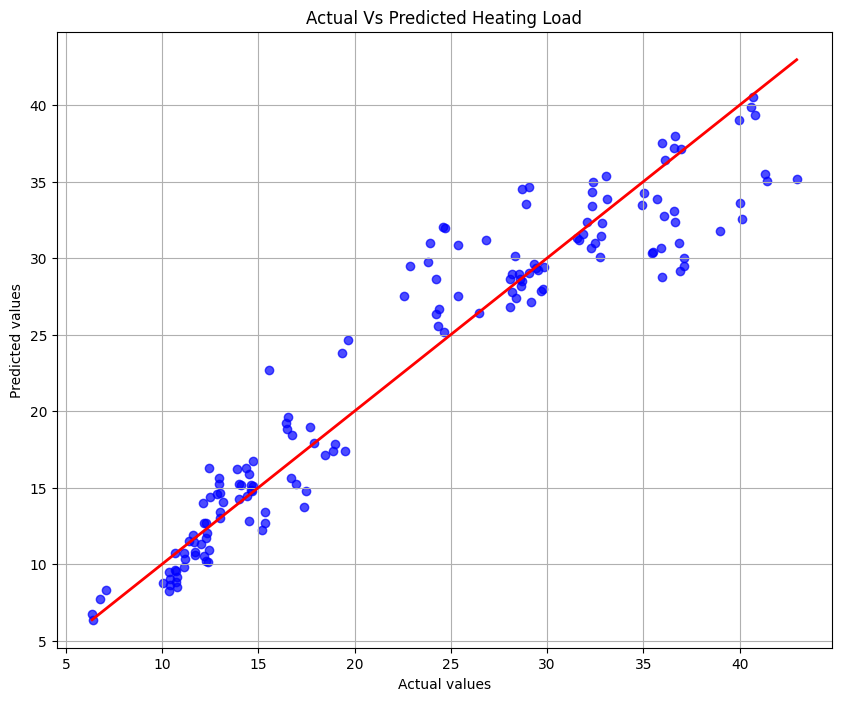

In [16]:
plt.figure(figsize =(10,8))
plt.scatter(y_test,y_Pred, alpha =0.7,color = 'blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red', lw = 2)
plt.title("Actual Vs Predicted Heating Load")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid()
plt.show()